## CS3481 Group Project 2

## Group Member List

#### LI Haotian, SID: 54780576
#### LI Zhiwei, SID: 54780945
#### WANG Yinuo, SID: 55670000
#### CHEN Jiaqing, SID: 55202577

### Import libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Overview

In [4]:
data = pd.read_csv('Data/speed-dating-data.csv', encoding='ISO-8859-1')

print(data.shape[0], 'rows and', data.shape[1], 'columns')

data.head()

8378 rows and 195 columns


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Men (1) women (0)
print(data.groupby('iid').mean().gender.value_counts())

# Total Participants count:
total_count = data.groupby('iid').count().shape[0]
print("Total Participants count:", total_count)

1.0    277
0.0    274
Name: gender, dtype: int64
Total Participants count: 551


### Preprocessing & Visulization

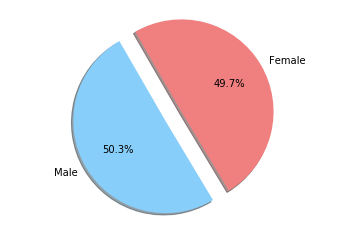

In [6]:
#Pie chart
labels = 'Male', 'Female'
sizes = [277, 274]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.savefig("Graphs/gender_distribution.png")

In [7]:
# Match (1), unmatch (0)
data['match'].value_counts(normalize=True)
data['match'].value_counts()


0    6998
1    1380
Name: match, dtype: int64

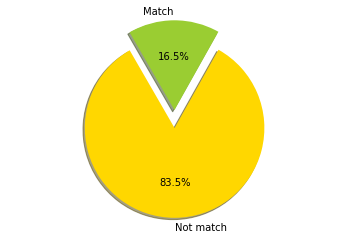

In [8]:
#Pie chart
labels = 'Not match', 'Match'
sizes = [6998, 1380]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.savefig("Graphs/matching.png")

In [9]:
data_individual = data.groupby('iid').mean()
# a[['gender','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
data_sex = data_individual.groupby("gender").mean()
data_rates_look_for = data_sex[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
data_peers_look_for = data_sex[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']]
data_oppos_look_for = data_sex[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']]

data_self_rate = data_sex[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]



In [10]:
data_rates_look_for

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
gender,,,,,,
0.0,18.020372,18.22223,20.971004,17.299108,12.818476,12.650632
1.0,27.248800,16.37960,19.387418,17.536836,8.759782,10.902400


What participant looks for in the opposite sex. 


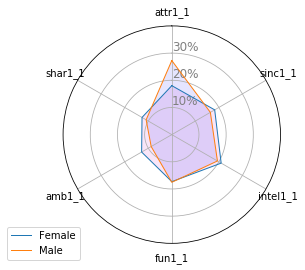

In [11]:
from math import pi
# ------- PART 1: Create background
 
# number of variable
categories=list(data_rates_look_for)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10%","20%","30%"], color="grey", size=12)
plt.ylim(0,40)
 
    
# ------- PART 2: Add plots 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=data_rates_look_for.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Ind2
values=data_rates_look_for.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("Graphs/1_1.png")

print("What participant looks for in the opposite sex. ")

Participants think fellow men/women look for in the opposite sex.


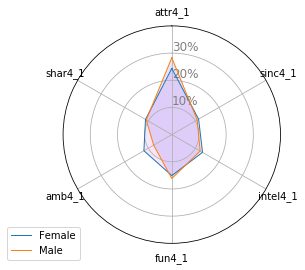

In [12]:
from math import pi
# ------- PART 1: Create background
 
# number of variable
categories=list(data_peers_look_for)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10%","20%","30%"], color="grey", size=12)
plt.ylim(0,40)
 
    
# ------- PART 2: Add plots 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=data_peers_look_for.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Ind2
values=data_peers_look_for.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("Graphs/4_1.png")

print("Participants think fellow men/women look for in the opposite sex.")

Participants think the opposite sex looks for in a date


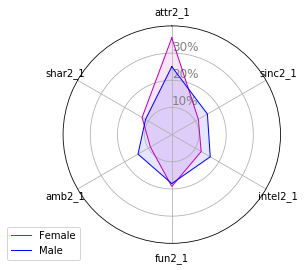

In [13]:
from math import pi
# ------- PART 1: Create background
 
# number of variable
categories=list(data_oppos_look_for)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10%","20%","30%"], color="grey", size=12)
plt.ylim(0,40)
 
    
# ------- PART 2: Add plots 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=data_oppos_look_for.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='m', label="Female")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Ind2
values=data_oppos_look_for.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='b', label="Male")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("Graphs/2_1.png")

print("Participants think the opposite sex looks for in a date")

how do you think others perceive you? 


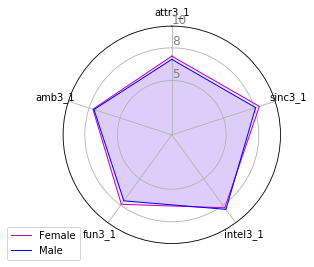

In [14]:
data_self_rate = data_sex[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]

from math import pi
# ------- PART 1: Create background
 
# number of variable
categories=list(data_self_rate)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,8,10], ["5","8","10"], color="grey", size=12)
plt.ylim(0,10)
 
    
# ------- PART 2: Add plots 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=data_self_rate.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='m', label="Female")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Ind2
values=data_self_rate.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='b', label="Male")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("Graphs/3_1.png")

print("how do you think others perceive you? ")

### Which of the 6 Attributes Actually Influence Decision Making?

On the x-axis, we calculate how many positive responses can a person get from the opposite sex. For example, if a man met with 10 women and 6 of them indicated that they would like to meet him again, his positive response rate would be 60%. On the y-axis, we averaged the scores in the 6 attributes that the man received from the 10 women.



Finally, the Pearson Product-Moment Correlation Coefficient (R score) is calculated for each of the attributes to show how strong the correlation is between the positive response rate and the score of the attributes.



In [15]:
# dec_o average: positive response rate
data_inluence_attr = data_individual[["dec_o","gender",'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

data_male_influence = data_inluence_attr.loc[data_inluence_attr['gender'] == 1]
data_female_influence = data_inluence_attr.loc[data_inluence_attr['gender'] == 0]

data_inluence_attr.head()


,dec_o,gender,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
iid,,,,,,,,
1,0.5,0.0,6.7,7.4,8.0,7.2,8.000000,7.1
2,0.6,0.0,7.7,7.1,7.9,7.5,7.500000,6.5
3,0.5,0.0,6.5,7.1,7.3,6.2,7.111111,6.0
4,0.6,0.0,7.0,7.1,7.7,7.5,7.700000,7.2
5,0.3,0.0,5.3,7.7,7.6,7.2,7.800000,6.2


#### Male

Attracitve
R (male) =  0.7730685986112993
R (female) =  0.7955347894903464


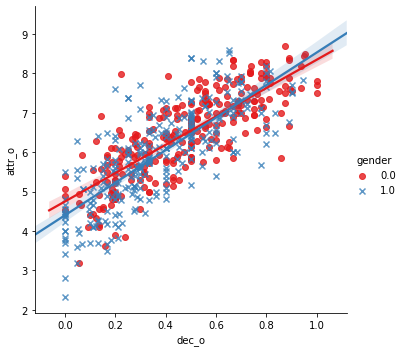

In [16]:
ax = sns.lmplot(x="dec_o", y="attr_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")

print("Attracitve")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["attr_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["attr_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/attractive.png')


Sincere
R (male) =  0.27023653257645186
R (female) =  0.19787642303303232


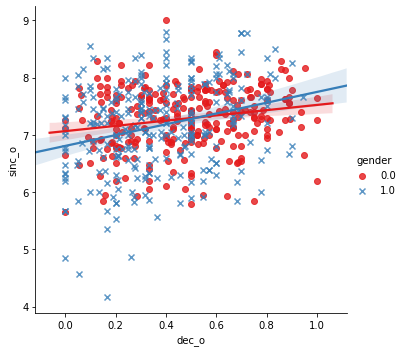

In [17]:
ax = sns.lmplot(x="dec_o", y="sinc_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")

print("Sincere")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["sinc_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["sinc_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/sincere.png')


Intelligent
R (male) =  0.2897935099710572
R (female) =  0.33990762060740337


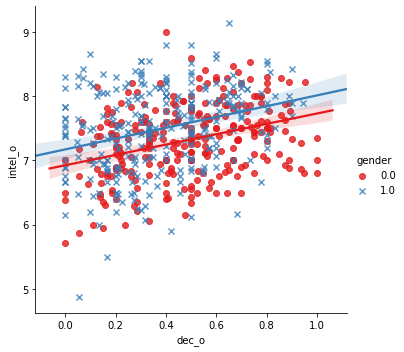

In [18]:
ax = sns.lmplot(x="dec_o", y="intel_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")

print("Intelligent")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["intel_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["intel_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/intelligent.png')



fun
R (male) =  0.6845124871363177
R (female) =  0.6300388368384277


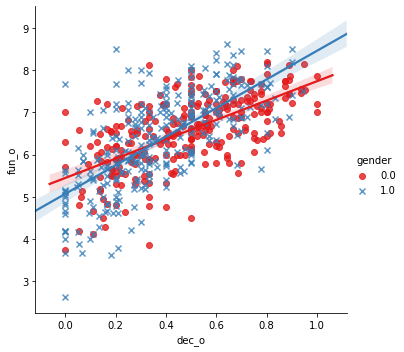

In [19]:
ax = sns.lmplot(x="dec_o", y="fun_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")

print("fun")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["fun_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["fun_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/fun.png')


Ambitious
R (male) =  0.27284813855746626
R (female) =  0.4616857130691962


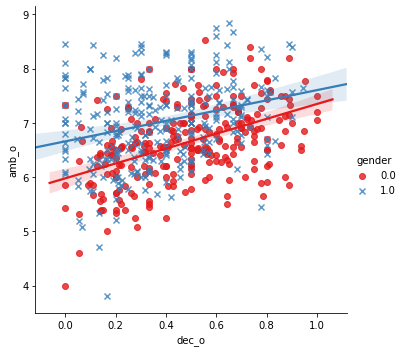

In [20]:
ax = sns.lmplot(x="dec_o", y="amb_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")


print("Ambitious")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["amb_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["amb_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/ambitious.png')


Shared Interests/Hobbies
R (male) =  0.6706851078197144
R (female) =  0.5589939627328546


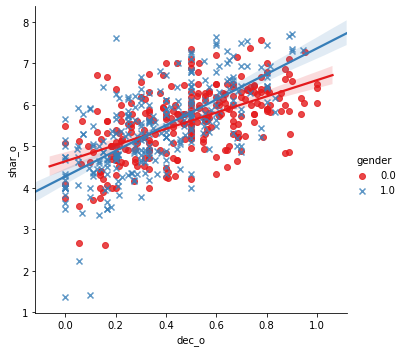

In [21]:
ax = sns.lmplot(x="dec_o", y="shar_o", hue="gender", data=data_inluence_attr, markers=["o", "x"],
                palette="Set1")


print("Shared Interests/Hobbies")

x_m = data_male_influence["dec_o"]
y_m = data_male_influence["shar_o"]

print("R (male) = ", stats.pearsonr(x_m, y_m)[0])

x_f = data_female_influence["dec_o"]
y_f = data_female_influence["shar_o"]

print("R (female) = ", stats.pearsonr(x_f, y_f)[0])

ax.savefig('Graphs/sharedInterests.png')


### Data cleaning

0. **Feature Selection** - 
    To Predict the match consequence based on certain features. We select a few personal fields and to do data cleaning and further feature engineering.

"gender", "int_corr", "samerace", "age_o", "age", "goal", "date", "go_out", "career_c", "field_cd", "exphappy", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr3_1","sinc3_1","intel3_1","fun3_1","amb3_1", "match"

1. For waves 6-9 (score 1-10), the calculation scheme is different from waves 1-5, 10-21 (spread 100 pts in total). First need to unify the marking scheme. (Column \*\*\***1_1**)

2. Filled empty with 0

3. There is no people with iid = 118 

4. Personal interest will not count twice, consider the shar1_1 attr includes the personal interest. Also int_corr includes mutual interests attributes

5. Add up inter_corr with 0, which will not bias the result.

6. Add missing carreer code with "others"

7. Remove rows without age information

8. Fill in null rates with average value

In [22]:
#feature selected for prediction
data_ml = data[["gender", "int_corr", "samerace", "age_o", "age", "goal", "date", "go_out", "career_c", "field_cd", "exphappy", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr3_1","sinc3_1","intel3_1","fun3_1","amb3_1", "match"]]

data_ml = data_ml[data_ml.age.notnull()]
data_ml = data_ml[data_ml.age_o.notnull()]
data_ml = data_ml[data_ml.date.notnull()]
data_ml = data_ml[data_ml.attr3_1.notnull()]


In [23]:
# Cleaned Dataset for training later
data_ml.head()

,gender,int_corr,samerace,age_o,age,goal,date,go_out,career_c,field_cd,...,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,match
0,0,0.14,0,27.0,21.0,2.0,7.0,1.0,1.0,1.0,...,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0
1,0,0.54,0,22.0,21.0,2.0,7.0,1.0,1.0,1.0,...,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0
2,0,0.16,1,22.0,21.0,2.0,7.0,1.0,1.0,1.0,...,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1
3,0,0.61,0,23.0,21.0,2.0,7.0,1.0,1.0,1.0,...,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1
4,0,0.21,0,24.0,21.0,2.0,7.0,1.0,1.0,1.0,...,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1


**Feature Engineering** - Calculate age difference

In [24]:
age_diff = []
for index, row in data_ml.iterrows():
    age_diff.append(abs(row.age - row.age_o))
    
age_diff

data_ml = data_ml.assign(age_diff = age_diff)
data_ml = data_ml.drop(['age', 'age_o'], axis = 1) 

In [25]:
data_ml.head()

,gender,int_corr,samerace,goal,date,go_out,career_c,field_cd,exphappy,attr1_1,...,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,match,age_diff
0,0,0.14,0,2.0,7.0,1.0,1.0,1.0,3.0,15.0,...,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,6.0
1,0,0.54,0,2.0,7.0,1.0,1.0,1.0,3.0,15.0,...,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0
2,0,0.16,1,2.0,7.0,1.0,1.0,1.0,3.0,15.0,...,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,1.0
3,0,0.61,0,2.0,7.0,1.0,1.0,1.0,3.0,15.0,...,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,2.0
4,0,0.21,0,2.0,7.0,1.0,1.0,1.0,3.0,15.0,...,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,3.0


**Data Normalization** - Scale each features

1. Min-max normalization - numerical attrs

In [26]:
data_ml_norm = data_ml

data_ml_norm.exphappy = data_ml_norm.exphappy / 10

data_ml_norm.attr1_1 = data_ml_norm.attr1_1 / 100
data_ml_norm.sinc1_1 = data_ml_norm.sinc1_1 / 100
data_ml_norm.intel1_1 = data_ml_norm.intel1_1 / 100
data_ml_norm.fun1_1 = data_ml_norm.fun1_1 / 100
data_ml_norm.amb1_1 = data_ml_norm.amb1_1 / 100
data_ml_norm.shar1_1 = data_ml_norm.shar1_1 / 100

data_ml_norm.attr3_1 = data_ml_norm.attr3_1 / 10
data_ml_norm.sinc3_1 = data_ml_norm.sinc3_1 / 10
data_ml_norm.intel3_1 = data_ml_norm.intel3_1 / 10
data_ml_norm.fun3_1 = data_ml_norm.fun3_1 / 10
data_ml_norm.amb3_1 = data_ml_norm.amb3_1 / 10

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms.fit_transform(data_ml_norm[['age_diff']])
data_ml_norm.age_diff = mms.fit_transform(data_ml_norm[['age_diff']])


<br>

2. One-hot Encoding - categorical attrs

In [28]:
#from sklearn.preprocessing import OneHotEncoder
# data_ml_norm = data_ml

# gender_encoded = pd.get_dummies(data_ml.gender, prefix='Gender')
# data_ml_norm = data_ml_norm.join(gender_encoded).drop(['gender'], axis=1)

# race_encoded = pd.get_dummies(data_ml.samerace, prefix='SameRace')
# data_ml_norm = data_ml_norm.join(race_encoded).drop(['samerace'], axis=1)

# career_encoded = pd.get_dummies(data_ml.career_c, prefix='Career')
# data_ml_norm = data_ml_norm.join(career_encoded).drop(['career_c'], axis=1)

# field_encoded = pd.get_dummies(data_ml.field_cd, prefix='Field')
# data_ml_norm = data_ml_norm.join(field_encoded).drop(['field_cd'], axis=1)

# goal_encoded = pd.get_dummies(data_ml.goal, prefix='Goal')
# data_ml_norm = data_ml_norm.join(goal_encoded).drop(['goal'], axis=1)

# date_encoded = pd.get_dummies(data_ml.date, prefix='Date')
# data_ml_norm = data_ml_norm.join(date_encoded).drop(['date'], axis=1)

# goout_encoded = pd.get_dummies(data_ml.go_out, prefix='GoOut')
# data_ml_norm = data_ml_norm.join(goout_encoded).drop(['go_out'], axis=1)


data_ml_norm.head()


,gender,int_corr,samerace,goal,date,go_out,career_c,field_cd,exphappy,attr1_1,...,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,match,age_diff
0,0,0.14,0,2.0,7.0,1.0,1.0,1.0,0.3,0.15,...,0.15,0.15,0.15,0.6,0.8,0.8,0.8,0.7,0,0.18750
1,0,0.54,0,2.0,7.0,1.0,1.0,1.0,0.3,0.15,...,0.15,0.15,0.15,0.6,0.8,0.8,0.8,0.7,0,0.03125
2,0,0.16,1,2.0,7.0,1.0,1.0,1.0,0.3,0.15,...,0.15,0.15,0.15,0.6,0.8,0.8,0.8,0.7,1,0.03125
3,0,0.61,0,2.0,7.0,1.0,1.0,1.0,0.3,0.15,...,0.15,0.15,0.15,0.6,0.8,0.8,0.8,0.7,1,0.06250
4,0,0.21,0,2.0,7.0,1.0,1.0,1.0,0.3,0.15,...,0.15,0.15,0.15,0.6,0.8,0.8,0.8,0.7,1,0.09375


### Deal with imbalanced-labeled data (supersampling & undersampling)

#### Process data

In [36]:
data_ml_match = data_ml_norm[(data_ml_norm['match']==1)].reset_index()
data_ml_nonmatch = data_ml_norm[(data_ml_norm['match']==0)].reset_index()


data_ml_match.shape, data_ml_nonmatch.shape

((1328, 23), (6792, 23))

<br>

<br>

<br>

### Machine Learning

In [74]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import plot_precision_recall_curve

#### NearestNeighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Accuracy (without normalized):  0.8294334975369458
Confusion Matrix:  [[1312   57]
 [ 220   35]]
Accuracy :  82.94334975369459
Report :                precision    recall  f1-score   support

           0       0.86      0.96      0.90      1369
           1       0.38      0.14      0.20       255

    accuracy                           0.83      1624
   macro avg       0.62      0.55      0.55      1624
weighted avg       0.78      0.83      0.79      1624



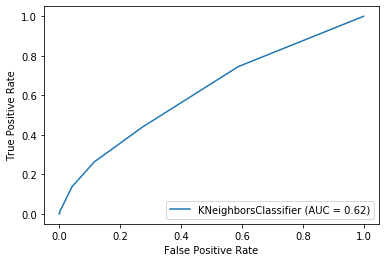

In [76]:
X = data_ml.loc[:, data_ml.columns != 'match']
y = data_ml.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

# ROC curve
plot_roc_curve(knn, X_test, y_test)
plt.savefig("Graphs/roc_knn.png")

print("Accuracy (without normalized): ",knn.score(X_test, y_test)) 

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : ", 
classification_report(y_test, y_pred)) 

print("======================================")


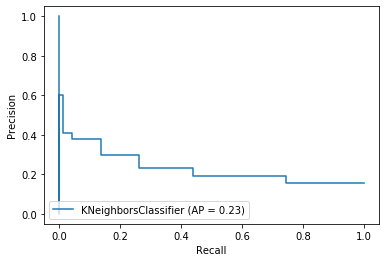

In [77]:
plot_precision_recall_curve(knn, X_test, y_test)
plt.savefig("Graphs/prc_knn.png")

Accuracy (with normalized):  0.8294334975369458
Confusion Matrix:  [[1312   57]
 [ 220   35]]
Accuracy :  82.94334975369459
Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      1369
           1       0.38      0.14      0.20       255

    accuracy                           0.83      1624
   macro avg       0.62      0.55      0.55      1624
weighted avg       0.78      0.83      0.79      1624



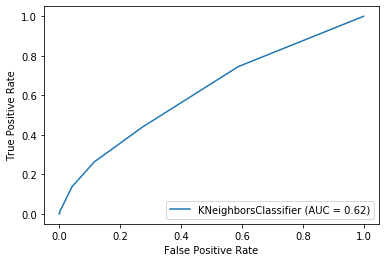

In [78]:

X = data_ml_norm.loc[:, data_ml_norm.columns != 'match']
y = data_ml_norm.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)

plot_roc_curve(knn, X_test, y_test)

print("Accuracy (with normalized): ",knn.score(X_test, y_test))

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : \n", 
classification_report(y_test, y_pred)) 

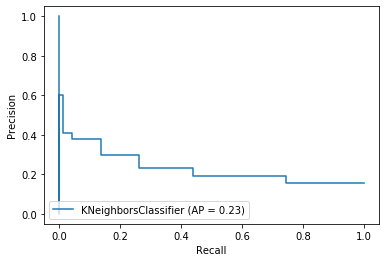

In [79]:
plot_precision_recall_curve(knn, X_test, y_test)


#### Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

Accuracy (without normalized):  0.8429802955665024
Confusion Matrix:  [[1369    0]
 [ 255    0]]
Accuracy :  84.29802955665025
Report :                precision    recall  f1-score   support

           0       0.84      1.00      0.91      1369
           1       0.00      0.00      0.00       255

    accuracy                           0.84      1624
   macro avg       0.42      0.50      0.46      1624
weighted avg       0.71      0.84      0.77      1624



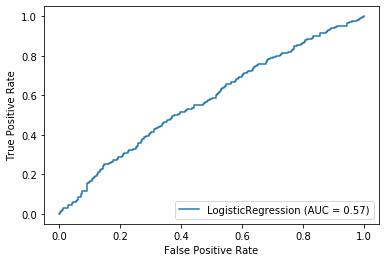

In [80]:
from sklearn.linear_model import LogisticRegression 

X = data_ml.loc[:, data_ml.columns != 'match']
y = data_ml.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

lr = LogisticRegression(random_state = 0) 

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plot_roc_curve(lr, X_test, y_test)
plt.savefig("Graphs/roc_lr.png")

print("Accuracy (without normalized): ",lr.score(X_test, y_test)) 

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : ", 
classification_report(y_test, y_pred)) 


print("======================================")


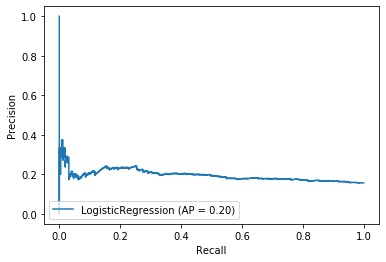

In [81]:
plot_precision_recall_curve(lr, X_test, y_test)
plt.savefig("Graphs/prc_lr.png")

Accuracy (with normalized):  0.8429802955665024
Confusion Matrix:  [[1369    0]
 [ 255    0]]
Accuracy :  84.29802955665025
Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1369
           1       0.00      0.00      0.00       255

    accuracy                           0.84      1624
   macro avg       0.42      0.50      0.46      1624
weighted avg       0.71      0.84      0.77      1624



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

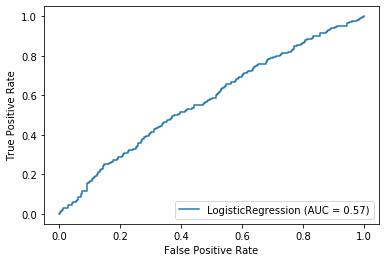

In [82]:
X = data_ml_norm.loc[:, data_ml_norm.columns != 'match']
y = data_ml_norm.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

plot_roc_curve(lr, X_test, y_test)

print("Accuracy (with normalized): ",lr.score(X_test, y_test))

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : \n", 
classification_report(y_test, y_pred)) 


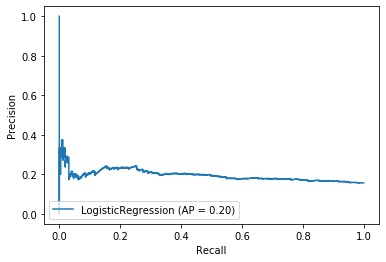

In [83]:
plot_precision_recall_curve(lr, X_test, y_test)

#### Decision Tree

In [838]:
from sklearn.tree import DecisionTreeClassifier 

In [839]:
# Decision Tree

# X = data_ml_norm.loc[:, data_ml.columns != 'match']
# y = data_ml_norm.match

X = data_ml_norm.loc[:, data_ml.columns != 'match']
y = data_ml_norm.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

Confusion Matrix:  [[1369    0]
 [ 255    0]]
Accuracy :  84.29802955665025
Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1369
           1       0.00      0.00      0.00       255

    accuracy                           0.84      1624
   macro avg       0.42      0.50      0.46      1624
weighted avg       0.71      0.84      0.77      1624



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

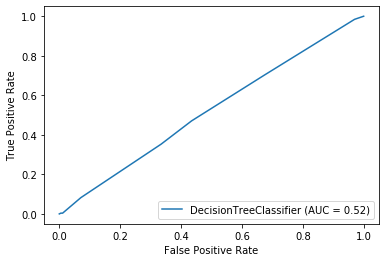

In [58]:
# DT using gini

dt_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

# Performing training 
dt_gini.fit(X_train, y_train) 

y_pred = dt_gini.predict(X_test) 

plot_roc_curve(dt_gini, X_test, y_test)
plt.savefig("Graphs/roc_dt_gini.png")

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : \n", 
classification_report(y_test, y_pred)) 

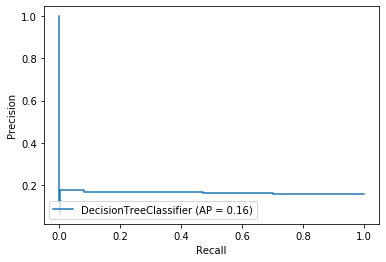

In [84]:
plot_precision_recall_curve(dt_gini, X_test, y_test)
plt.savefig("Graphs/prc_dt_gini.png")

<br>

Confusion Matrix:  [[1369    0]
 [ 255    0]]
Accuracy :  84.29802955665025
Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1369
           1       0.00      0.00      0.00       255

    accuracy                           0.84      1624
   macro avg       0.42      0.50      0.46      1624
weighted avg       0.71      0.84      0.77      1624



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

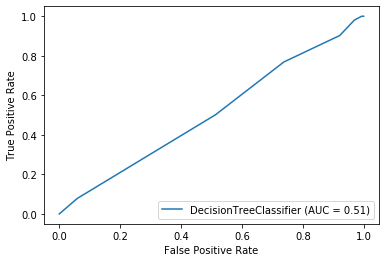

In [85]:
# DT using entropy

dt_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
# Performing training 
dt_entropy.fit(X_train, y_train) 

y_pred = dt_entropy.predict(X_test) 

plot_roc_curve(dt_entropy, X_test, y_test)
plt.savefig("Graphs/roc_dt_entropy.png")

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : \n", 
classification_report(y_test, y_pred)) 

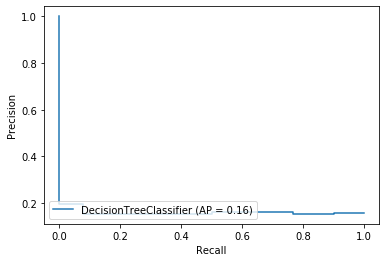

In [70]:
plot_precision_recall_curve(dt_entropy, X_test, y_test)

#### Naïve Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB 

Confusion Matrix:  [[1360    9]
 [ 250    5]]
Accuracy :  84.05172413793103
Report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1369
           1       0.36      0.02      0.04       255

    accuracy                           0.84      1624
   macro avg       0.60      0.51      0.48      1624
weighted avg       0.77      0.84      0.78      1624



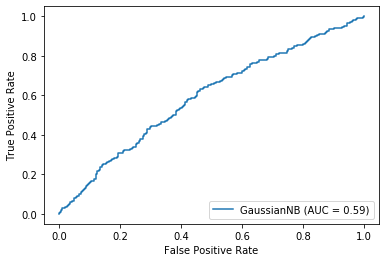

In [64]:
X = data_ml_norm.loc[:, data_ml.columns != 'match']
y = data_ml_norm.match

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

y_pred = gnb.predict(X_test) 

plot_roc_curve(gnb, X_test, y_test)
plt.savefig("Graphs/roc_nb.png")

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

print("Report : \n", 
classification_report(y_test, y_pred)) 

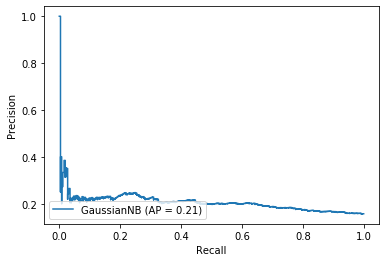

In [65]:
plot_precision_recall_curve(gnb, X_test, y_test)